In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library

# Start with reading the db, filtering outliers and filling the missing data

In [2]:
df = pd.read_csv('protein.csv', sep=',', header=0)

In [3]:
df.head(5)

,ID,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10
0,0,-1.006417,0.882125,NaN,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909


In [4]:
df.shape

(494, 11)

In [5]:
df.describe()

,ID,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10
count,494.000000,489.000000,476.000000,478.000000,476.000000,480.000000,477.000000,487.000000,485.000000,479.000000,477.000000
mean,246.500000,-0.462127,-1.173895,-0.227398,1.465577,0.124944,-0.742783,0.362071,-0.200106,-0.923517,0.146468
std,142.749781,6.533040,19.906275,8.062840,17.277465,3.568627,10.348845,5.693674,4.410810,13.786652,1.662280
min,0.000000,-96.469898,-407.526638,-123.628501,-241.013809,-27.873525,-150.310102,-39.718672,-92.917408,-246.757608,-2.431825
25%,123.250000,-1.018382,-0.948167,-0.666352,-2.263689,-1.710851,-1.741266,-0.788513,-0.818456,-1.048256,-0.637084
50%,246.500000,-0.313710,-0.225694,0.104332,1.745072,-0.347418,-0.696808,-0.100930,-0.082172,0.039068,0.043498
75%,369.750000,0.548909,0.496533,0.817167,3.499794,2.251205,1.240977,0.749700,0.670535,0.872264,0.643888
max,493.000000,15.321833,69.568058,61.466833,208.838313,40.658268,64.340135,87.208302,11.370135,54.358368,23.258043


### for now, fill the NaN with the mean values. And replace the outliers with the mean values

Using the box plot to discover the outliers for some protein:

<AxesSubplot:xlabel='protein_3'>

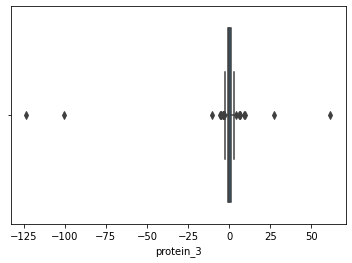

In [6]:
sns.boxplot(x=df['protein_3'])

I will use the z-value to filter outliers:
The Z-score is the signed number of standard deviations
by which the value of an observation or data point is 
above the mean value of what is being observed or measured.

To use the Z-value, i drop all the NaN rows.

In [7]:
df_nonan = df.dropna()

In [8]:
df_nonan.shape

(373, 11)

In [9]:
from scipy import stats
z = np.abs(stats.zscore(df_nonan))

In [10]:
threshold = 3
outliers_arr = np.where(z > 3)
print(outliers_arr)

(array([ 43,  52,  66,  98, 114, 128, 150, 156, 173, 196, 209, 215, 219,
       223, 236, 241, 265, 269, 276, 276, 286, 287, 289, 298, 304, 305,
       323, 340, 349, 349, 363], dtype=int64), array([ 9,  6,  1,  9,  5,  8,  9,  1,  4,  1,  7,  6,  8, 10,  2,  5,  9,
        3,  3,  7,  3,  7,  3,  2,  6, 10,  8, 10,  4,  5,  4],
      dtype=int64))


In [11]:
# outliers_arr[0] - the rows numbers
# outliers_arr[1] - the columns numbers

In [12]:

from copy import copy
protein_keys = ['protein_1', 'protein_2', 'protein_3', 'protein_4', 'protein_5',
       'protein_6', 'protein_7', 'protein_8', 'protein_9', 'protein_10']

# threshold sets the limit = std*threshold, beyond which the outliers are detected
threshold = 3

for key in protein_keys:
    
    new_df = df[['ID',key]].copy()
    
    # remove nans
    new_df = new_df.dropna()
    
    IDs_list = list(new_df.ID)
    
    z = np.abs(stats.zscore(new_df[key]))
    outliers_arr = np.where(z > threshold)
    
    if len(outliers_arr[0]) != 0:
        
        
#         print("\n")
#         print(outliers_arr)

        # printing those outlier values
        for outlier_idx in outliers_arr[0]:
#             print(new_df[key][IDs_list[outlier_idx]])

            # dropping those rows from the new_df
            new_df = new_df.drop(IDs_list[outlier_idx])
            
    else:
        pass # no outliers were detected
        
    
    # find the mean WITHOUT the outliers
    new_mean = new_df[key].mean()
    print(f"new_mean = {new_mean} for key {key}")
    
    # fill the outliers in the original df with mean
#     print("\n\nOriginal dataset")
    for outlier_idx in outliers_arr[0]:
        
        # dropping those rows from the new_df
        print(f"Replacing for ID {IDs_list[outlier_idx]} at key {key}")
        # df.loc[:, ('ID', key)].at[IDs_list[outlier_idx], key] = new_mean
        df.at[IDs_list[outlier_idx], key] = new_mean
    
    
        
    
    
    
    

new_mean = 0.017955286086639738 for key protein_1
Replacing for ID 92 at key protein_1
Replacing for ID 211 at key protein_1
Replacing for ID 265 at key protein_1
new_mean = -0.245733383043987 for key protein_2
Replacing for ID 315 at key protein_2
Replacing for ID 345 at key protein_2
Replacing for ID 399 at key protein_2
new_mean = 0.05614968836723383 for key protein_3
Replacing for ID 357 at key protein_3
Replacing for ID 364 at key protein_3
Replacing for ID 383 at key protein_3
Replacing for ID 387 at key protein_3
new_mean = 0.9839146673330059 for key protein_4
Replacing for ID 207 at key protein_4
Replacing for ID 233 at key protein_4
Replacing for ID 465 at key protein_4
Replacing for ID 482 at key protein_4
new_mean = 0.1428618867472816 for key protein_5
Replacing for ID 158 at key protein_5
Replacing for ID 322 at key protein_5
Replacing for ID 465 at key protein_5
new_mean = -0.15778544624947682 for key protein_6
Replacing for ID 71 at key protein_6
Replacing for ID 98 at ke

## Box plot looks much better

<AxesSubplot:xlabel='protein_3'>

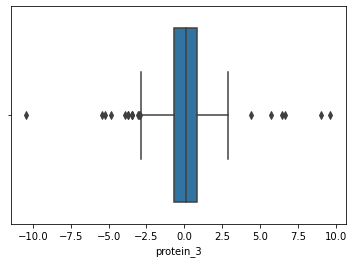

In [13]:
sns.boxplot(x=df['protein_3'])

## Filling the NaN values with the correct mean values

In [14]:
df = df.fillna(df.mean())

In [16]:
df.to_csv('protein_fixed.csv', sep=',', header=True, index=False)

# CLUSTERING

In [17]:
from sklearn.cluster import KMeans
import numpy as np
X = df.drop(['ID'], axis=1).values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [19]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X)

### user the scaller on the same plot for each class

In [21]:
labels = kmeans.labels_

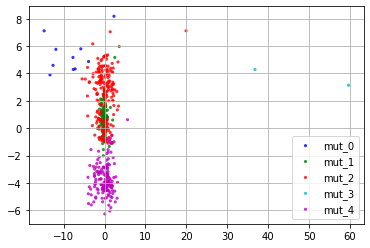

In [97]:
# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')


fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()
